In [37]:
from __future__ import division,print_function,unicode_literals

import numpy as np
import os 

#stable output across runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

#supress warning (SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore",message="^internal gelsd")

In [38]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1) #Theta_0 = 4 Theta_1 = 3

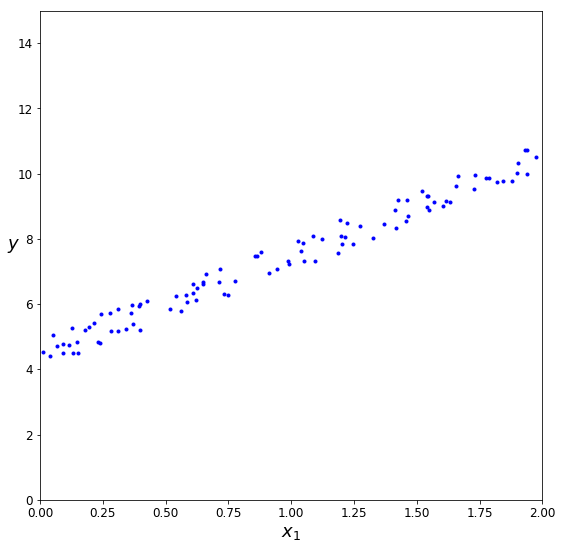

In [53]:
plt.figure(figsize=(9,9))
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [54]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [55]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [56]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

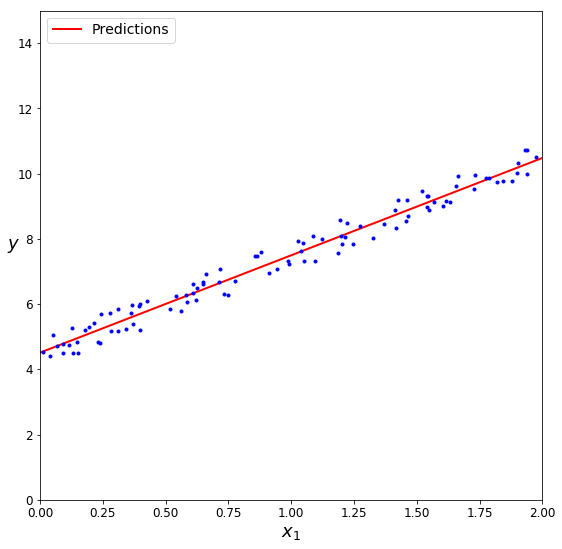

In [57]:
plt.figure(figsize=(9,9))
plt.plot(X_new,y_predict,"r-",linewidth=2,label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.legend(loc="upper left",fontsize=14)
plt.axis([0,2,0,15])
plt.show()

In [62]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_,lin_reg.coef_


(array([4.51359766]), array([[2.98323418]]))

In [63]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])